In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file using pandas
df = pd.read_csv('data_car.csv')

# Analysing data

In [3]:
#Shape of data
df.shape

(11914, 16)

In [4]:
#Checking the columns
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
#information of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine_Fuel_Type   11911 non-null  object 
 4   Engine_HP          11845 non-null  float64
 5   Engine_Cylinders   11884 non-null  float64
 6   Transmission_Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number_of_Doors    11908 non-null  float64
 9   Market_Category    8172 non-null   object 
 10  Vehicle_Size       11914 non-null  object 
 11  Vehicle_Style      11914 non-null  object 
 12  highway_MPG        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
#generating the first five rows of the data
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#Checking for duplicates

display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 715'

In [8]:
#Removing duplicates if any in the data
df.drop_duplicates(inplace=True)
df

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [9]:
#Checking for duplicates again
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 0'

In [10]:
#Finding missing value if any
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3376
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [15]:
#Filling the null with mode
df['Market_Category'].fillna(df['Market_Category'].mode()[0], inplace = True)
df['Engine_Fuel_Type'].fillna(df['Engine_Fuel_Type'].mode()[0], inplace = True)
df['Engine_HP'].fillna(df['Engine_HP'].mean(), inplace = True)
df['Engine_Cylinders'].fillna(df['Engine_Cylinders'].median(), inplace = True)


In [16]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      6
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [17]:
#Checking Statistics Summary of numerical columns
df.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.666845,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,109.811049,1.794696,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [18]:
#Making List of Categorical Columns

categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['Make',
 'Model',
 'Engine_Fuel_Type',
 'Transmission_Type',
 'Driven_Wheels',
 'Market_Category',
 'Vehicle_Size',
 'Vehicle_Style']

In [20]:
#Removing "unknown" from the column
df.drop(df.loc[df['Transmission_Type']=='unknown'].index, inplace=True)
df.shape

(11199, 16)

In [22]:
#Correlation Matrix of Data
df.corr()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
Year,1.000000,0.335697,-0.034152,0.247574,0.244972,0.188417,0.085874,0.209635
Engine_HP,0.335697,1.000000,0.772055,-0.129091,-0.358847,-0.349990,0.042277,0.658817
Engine_Cylinders,-0.034152,0.772055,1.000000,-0.149546,-0.596246,-0.562599,0.038325,0.538531
Number_of_Doors,0.247574,-0.129091,-0.149546,1.000000,0.114673,0.120682,-0.057235,-0.144925
highway_MPG,0.244972,-0.358847,-0.596246,0.114673,1.000000,0.886299,-0.017159,-0.166631
city_mpg,0.188417,-0.349990,-0.562599,0.120682,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.042277,0.038325,-0.057235,-0.017159,-0.000549,1.000000,-0.048371
MSRP,0.209635,0.658817,0.538531,-0.144925,-0.166631,-0.162343,-0.048371,1.000000


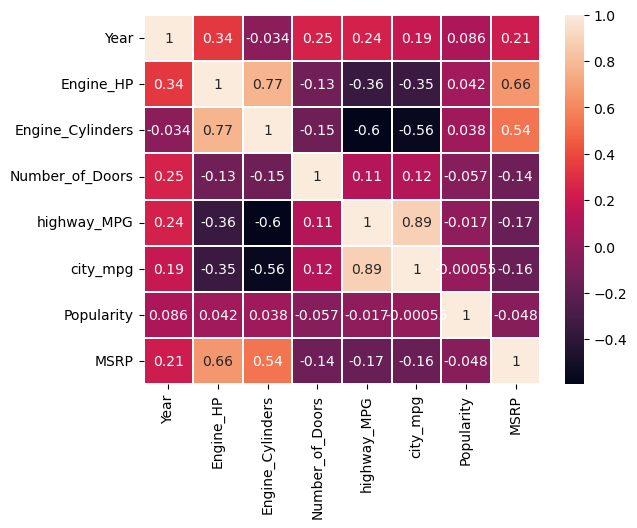

In [23]:
sns.heatmap(df.corr(),annot = True, lw = 0.1);

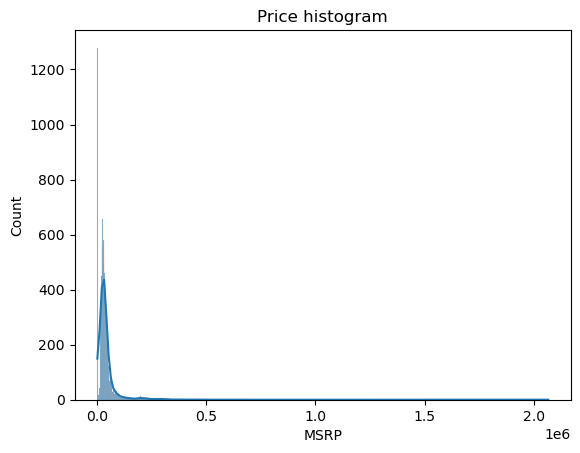

In [24]:
sns.histplot(data=df, x=df.MSRP, kde=True)
plt.title('Price histogram')
plt.show()

In [25]:
#Converting categorical to numerical columns
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
df['Make']=le.fit_transform(df['Make'])
df['Model']=le.fit_transform(df['Model'])
df['Engine_Fuel_Type']=le.fit_transform(df['Engine_Fuel_Type'])
df['Transmission_Type']=le.fit_transform(df['Transmission_Type'])
df['Driven_Wheels']=le.fit_transform(df['Driven_Wheels'])
df['Market_Category']=le.fit_transform(df['Market_Category'])
df['Vehicle_Size']=le.fit_transform(df['Vehicle_Size'])
df['Vehicle_Style']=le.fit_transform(df['Vehicle_Style'])

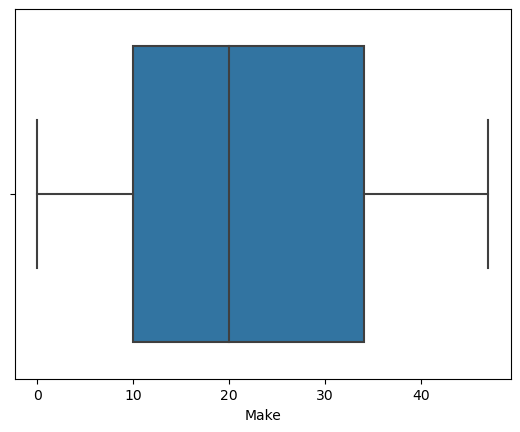

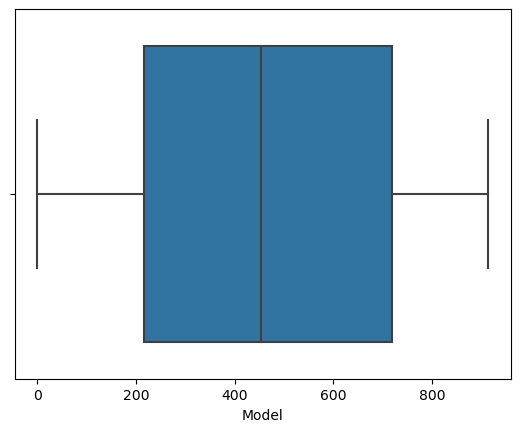

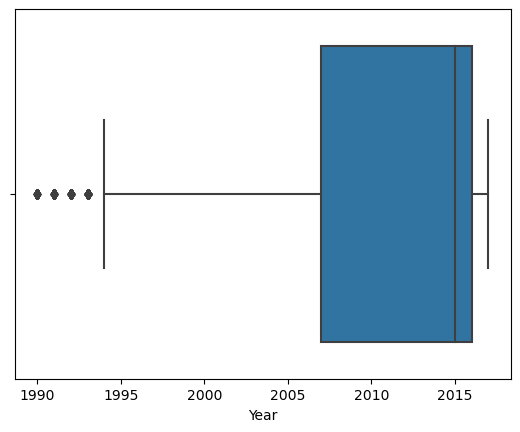

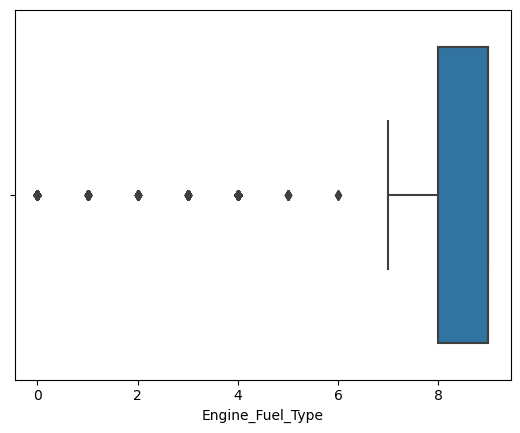

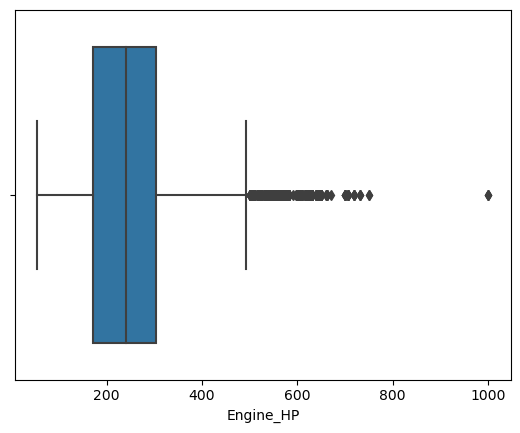

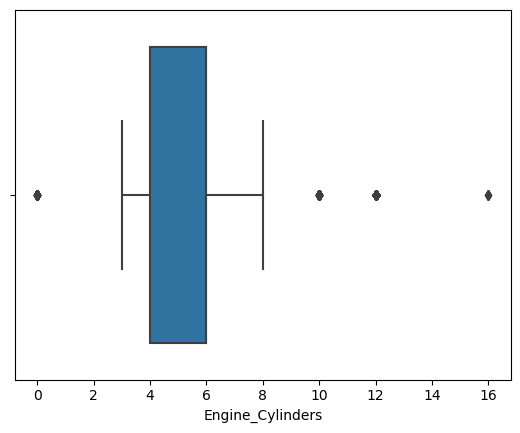

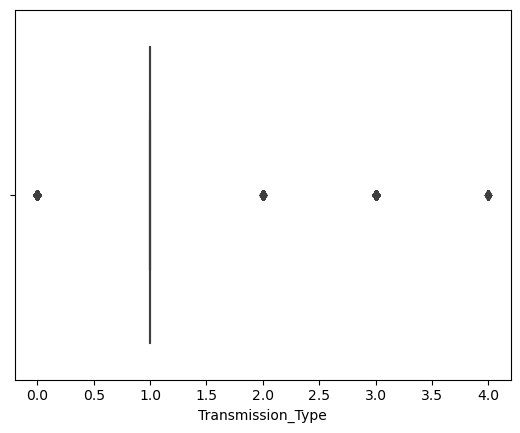

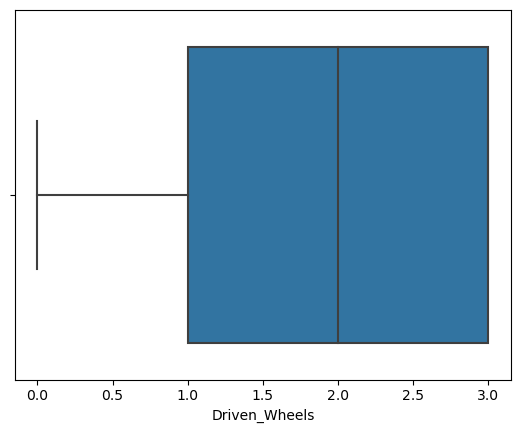

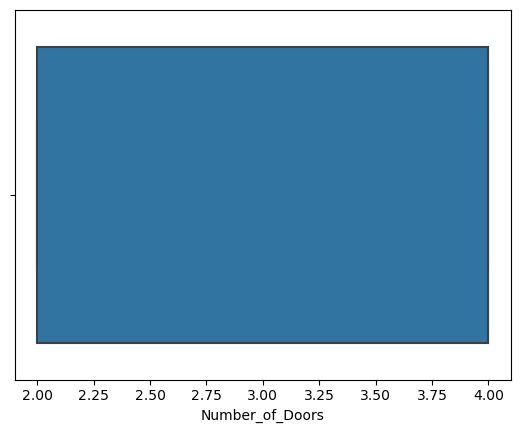

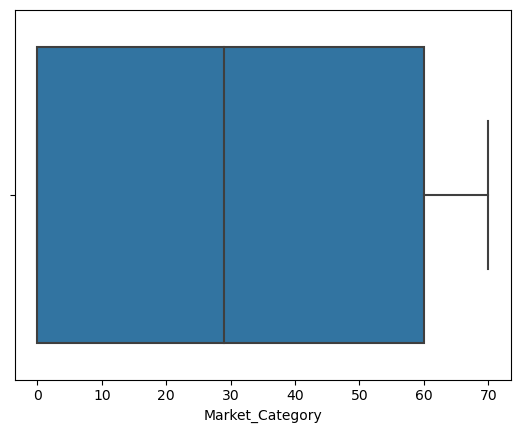

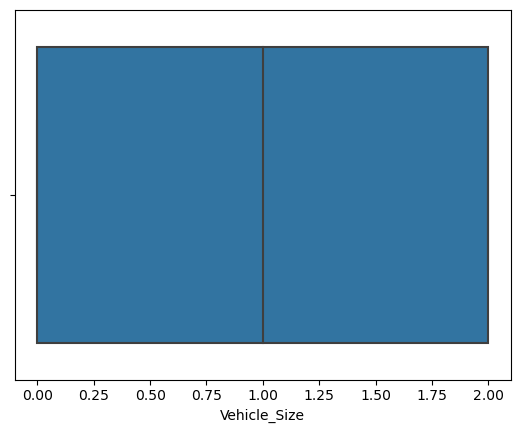

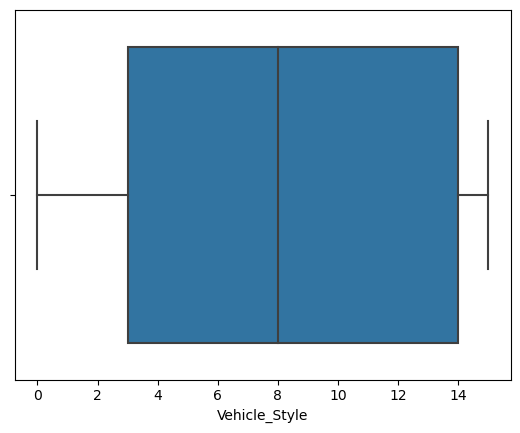

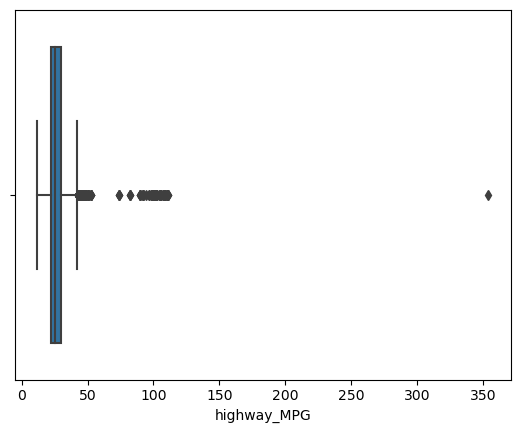

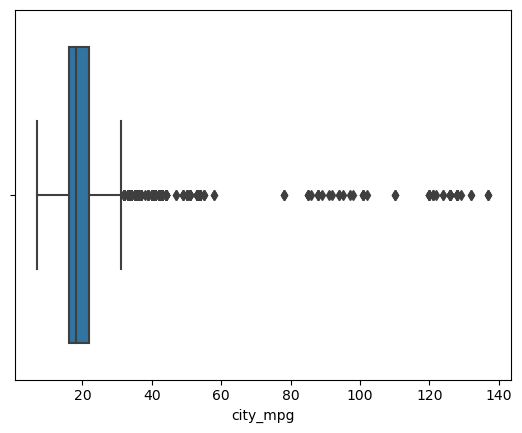

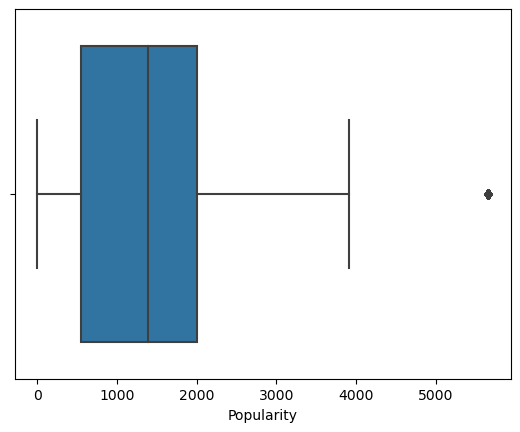

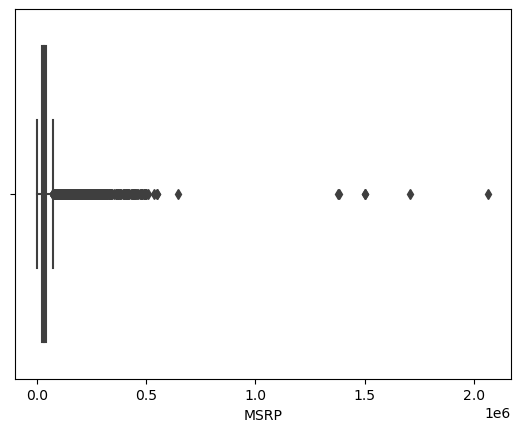

In [27]:
#Outlier detection
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [ ]:
#OUTLIERS WERE DETECTED IN:
Year
Engine_Fuel_Type
Engine_HP
Engine_Cylinders
Transmission_Type
Highway_MGP
City_MGP
Popularity
MSRP

In [30]:
#Removing outliers

from scipy import stats
#Year
IQR=stats.iqr(df.Year,interpolation='midpoint')
IQR

9.0

In [31]:
Q1=df.Year.quantile(0.25)
Q3=df.Year.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1993.5, 2029.5)

In [32]:
df.loc[df.Year<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
17,3,4,1992,9,172.0,6.0,3,2,4.0,63,2,14,24,17,3105,2000
19,3,4,1992,9,172.0,6.0,1,0,4.0,63,2,15,20,16,3105,2000
21,3,4,1992,9,172.0,6.0,3,0,4.0,63,2,14,21,16,3105,2000
22,3,4,1993,9,172.0,6.0,3,2,4.0,63,2,14,24,17,3105,2000
23,3,4,1993,9,172.0,6.0,1,0,4.0,63,2,15,20,16,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,0,859,1992,9,176.0,5.0,3,2,4.0,63,2,14,24,18,204,2000
11376,0,859,1993,9,176.0,5.0,3,2,4.0,63,2,14,24,18,204,2000
11792,42,886,1991,9,97.0,4.0,3,2,2.0,0,0,8,29,22,640,2000
11793,42,886,1991,9,145.0,6.0,1,2,2.0,0,0,8,26,18,640,2000


In [37]:
df.loc[df.Year>max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [38]:
df.loc[df['Year']>max_limit,'Year']=np.median(df.Year)
df.loc[df['Year']<min_limit,'Year']=np.median(df.Year)

In [40]:
#Engine_Fuel_Type
IQR=stats.iqr(df.Engine_Fuel_Type,interpolation='midpoint')
IQR

1.0

In [41]:
Q1=df.Engine_Fuel_Type.quantile(0.25)
Q3=df.Engine_Fuel_Type.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(6.5, 10.5)

In [42]:
df.loc[df.Engine_Fuel_Type<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
64,10,9,2015,4,184.0,4.0,1,2,4.0,41,2,14,36,23,1013,25170
65,10,9,2015,4,184.0,4.0,1,2,4.0,41,2,14,36,23,1013,23950
66,10,9,2015,4,295.0,6.0,1,0,4.0,48,2,14,29,18,1013,29370
67,10,9,2015,4,184.0,4.0,1,2,4.0,41,2,14,36,23,1013,21995
68,10,9,2015,4,184.0,4.0,1,2,4.0,48,2,14,36,23,1013,26625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,15,893,2016,4,355.0,8.0,1,1,4.0,48,1,3,22,16,549,60000
11876,15,893,2017,4,355.0,8.0,1,3,4.0,48,1,3,23,16,549,57315
11877,15,893,2017,4,355.0,8.0,1,1,4.0,48,1,3,22,16,549,51530
11879,15,893,2017,4,355.0,8.0,1,1,4.0,48,1,3,22,16,549,60315


In [43]:
df.loc[df.Engine_Fuel_Type>max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [44]:
df.loc[df['Engine_Fuel_Type']>max_limit,'Engine_Fuel_Type']=np.median(df.Engine_Fuel_Type)
df.loc[df['Engine_Fuel_Type']<min_limit,'Engine_Fuel_Type']=np.median(df.Engine_Fuel_Type)

In [45]:
#Engine_HP
IQR=stats.iqr(df.Engine_HP,interpolation='midpoint')
IQR

131.0

In [46]:
Q1=df.Engine_HP.quantile(0.25)
Q3=df.Engine_HP.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-24.5, 499.5)

In [47]:
df.loc[df.Engine_HP<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [48]:
df.loc[df.Engine_HP>max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
466,13,31,2013,8,562.0,8.0,0,3,2.0,30,0,6,17,13,2774,257412
467,13,31,2013,8,562.0,8.0,0,3,2.0,30,0,8,17,13,2774,233509
468,13,31,2014,8,562.0,8.0,0,3,2.0,30,0,8,17,13,2774,233509
469,13,31,2014,8,597.0,8.0,0,3,2.0,30,0,8,17,13,2774,288000
470,13,31,2014,8,562.0,8.0,0,3,2.0,30,0,6,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,4,873,2016,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,98800
11510,4,873,2017,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,98800
11523,4,875,2015,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,102100
11524,4,875,2016,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,102200


In [49]:
df.loc[df['Engine_HP']>max_limit,'Engine_HP']=np.median(df.Engine_HP)
df.loc[df['Engine_HP']<min_limit,'Engine_HP']=np.median(df.Engine_HP)

In [50]:
#Engine_Cylinders
IQR=stats.iqr(df.Engine_Cylinders,interpolation='midpoint')
IQR

2.0

In [51]:
Q1=df.Engine_Cylinders.quantile(0.25)
Q3=df.Engine_Cylinders.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 9.0)

In [52]:
df.loc[df.Engine_Cylinders<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
539,12,41,2015,9,253.388859,0.0,2,2,2.0,50,0,0,108,122,819,31800
540,12,41,2016,9,253.388859,0.0,2,2,2.0,50,0,0,103,121,819,31800
541,12,41,2017,9,253.388859,0.0,2,2,2.0,50,0,0,103,121,819,31800
1680,31,133,2015,9,177.000000,0.0,2,2,4.0,57,0,2,82,85,617,41450
1681,31,133,2016,9,177.000000,0.0,2,2,4.0,57,0,2,82,85,617,41450
1682,31,133,2017,9,177.000000,0.0,2,2,4.0,57,0,2,82,85,617,39900
4705,18,354,2013,9,253.388859,0.0,2,2,4.0,50,0,2,105,132,2202,36625
4706,18,354,2014,9,253.388859,0.0,2,2,4.0,50,0,2,105,132,2202,36625
4785,14,359,2015,9,253.388859,0.0,2,2,4.0,50,0,2,99,110,5657,29170
4789,14,359,2016,9,253.388859,0.0,2,2,4.0,50,0,2,99,110,5657,29170


In [53]:
df.loc[df.Engine_Cylinders>max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
460,13,30,2001,8,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,223970
461,13,30,2001,8,442.0,12.0,3,3,2.0,30,0,8,15,9,2774,219775
462,13,30,2002,8,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,228625
463,13,30,2002,8,442.0,12.0,3,3,2.0,30,0,8,15,9,2774,224585
464,13,30,2003,8,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,2,861,2012,8,490.0,12.0,1,3,2.0,30,2,8,18,13,259,208295
11395,2,861,2012,8,490.0,12.0,1,3,2.0,30,2,6,18,13,259,223295
11448,38,867,2014,8,240.0,12.0,1,3,2.0,32,1,8,21,13,86,284900
11449,38,867,2015,8,240.0,12.0,1,3,2.0,32,1,8,21,13,86,294025


In [54]:
df.loc[df['Engine_Cylinders']>max_limit,'Engine_Cylinders']=np.median(df.Engine_Cylinders)
df.loc[df['Engine_Cylinders']<min_limit,'Engine_Cylinders']=np.median(df.Engine_Cylinders)

In [55]:
#Transmission_Type
IQR=stats.iqr(df.Transmission_Type,interpolation='midpoint')
IQR

0.0

In [56]:
Q1=df.Transmission_Type.quantile(0.25)
Q3=df.Transmission_Type.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 1.0)

In [57]:
df.loc[df.Transmission_Type<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
296,13,24,2002,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,150694
297,13,24,2002,8,400.0,8.0,0,3,2.0,30,0,6,15,10,2774,170829
299,13,24,2003,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,154090
301,13,24,2003,8,400.0,8.0,0,3,2.0,30,0,6,15,10,2774,176287
302,13,24,2004,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,157767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11896,4,898,2014,8,335.0,6.0,0,3,2.0,64,0,6,24,17,3916,65800
11898,4,898,2015,8,300.0,6.0,0,3,2.0,64,0,6,24,17,3916,56950
11899,4,898,2015,8,335.0,6.0,0,3,2.0,64,0,6,24,17,3916,65800
11900,4,898,2016,8,300.0,6.0,0,3,2.0,64,0,6,24,17,3916,57500


In [58]:
df.loc[df.Transmission_Type<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
296,13,24,2002,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,150694
297,13,24,2002,8,400.0,8.0,0,3,2.0,30,0,6,15,10,2774,170829
299,13,24,2003,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,154090
301,13,24,2003,8,400.0,8.0,0,3,2.0,30,0,6,15,10,2774,176287
302,13,24,2004,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,157767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11896,4,898,2014,8,335.0,6.0,0,3,2.0,64,0,6,24,17,3916,65800
11898,4,898,2015,8,300.0,6.0,0,3,2.0,64,0,6,24,17,3916,56950
11899,4,898,2015,8,335.0,6.0,0,3,2.0,64,0,6,24,17,3916,65800
11900,4,898,2016,8,300.0,6.0,0,3,2.0,64,0,6,24,17,3916,57500


In [59]:
df.loc[df['Transmission_Type']>max_limit,'Transmission_Type']=np.median(df.Transmission_Type)
df.loc[df['Transmission_Type']<min_limit,'Transmission_Type']=np.median(df.Transmission_Type)

In [62]:


#Highway_MGP
IQR=stats.iqr(df.highway_MPG,interpolation='midpoint')
IQR

8.0

In [63]:
Q1=df.highway_MPG.quantile(0.25)
Q3=df.highway_MPG.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.0, 42.0)

In [64]:
df.loc[df.highway_MPG<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [65]:
df.loc[df.highway_MPG<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [66]:
df.loc[df['highway_MPG']>max_limit,'highway_MPG']=np.median(df.highway_MPG)
df.loc[df['highway_MPG']<min_limit,'highway_MPG']=np.median(df.highway_MPG)

In [68]:
#City_MGP
IQR=stats.iqr(df.city_mpg,interpolation='midpoint')
IQR

6.0

In [69]:
Q1=df.city_mpg.quantile(0.25)
Q3=df.city_mpg.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(7.0, 31.0)

In [70]:
df.loc[df.city_mpg<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [71]:
df.loc[df.city_mpg<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [72]:
df.loc[df['city_mpg']>max_limit,'city_mpg']=np.median(df.city_mpg)
df.loc[df['city_mpg']<min_limit,'city_mpg']=np.median(df.city_mpg)

In [73]:
#Popularity
IQR=stats.iqr(df.Popularity,interpolation='midpoint')
IQR

1460.0

In [74]:
Q1=df.Popularity.quantile(0.25)
Q3=df.Popularity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1641.0, 4199.0)

In [75]:
df.loc[df.Popularity<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [76]:
df.loc[df.Popularity<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [77]:
df.loc[df['Popularity']>max_limit,'Popularity']=np.median(df.Popularity)
df.loc[df['Popularity']<min_limit,'Popularity']=np.median(df.Popularity)

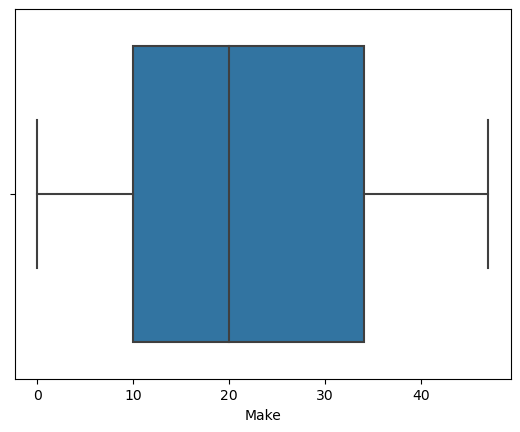

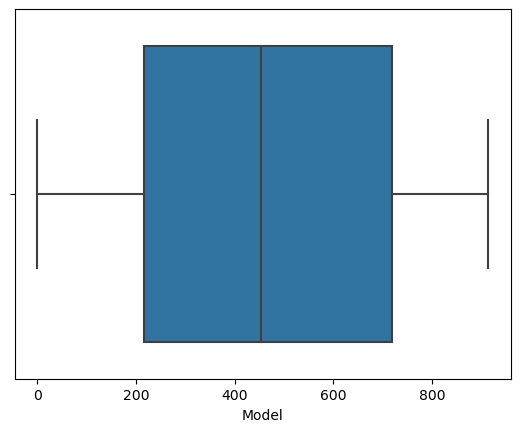

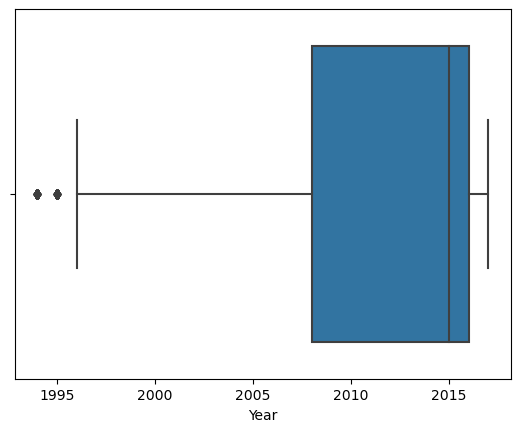

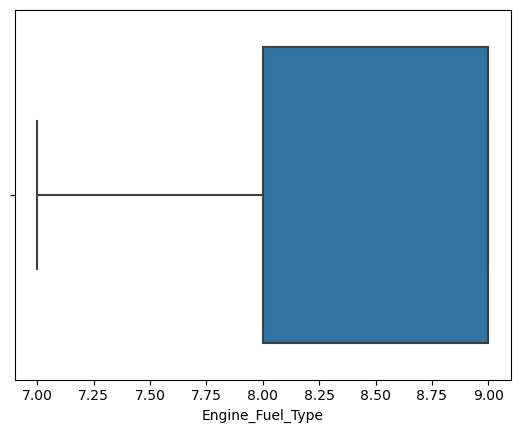

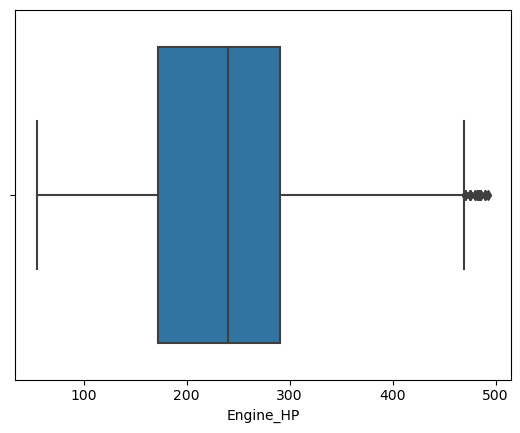

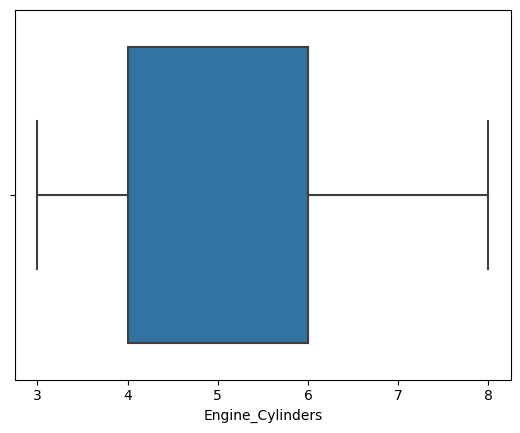

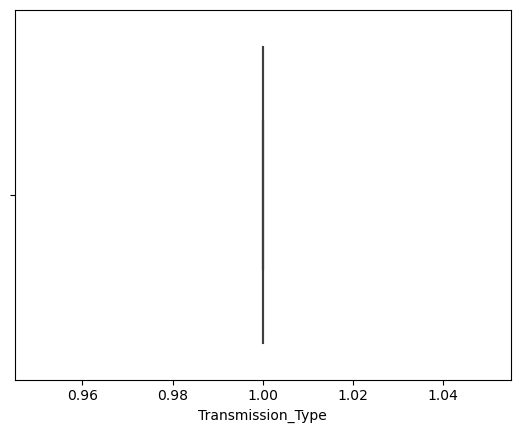

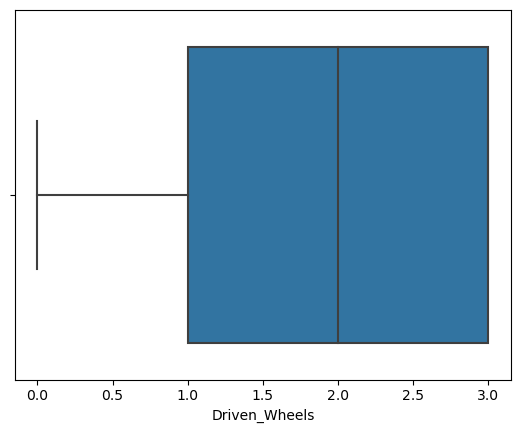

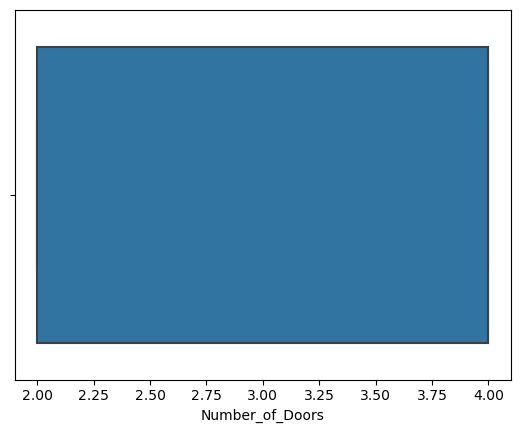

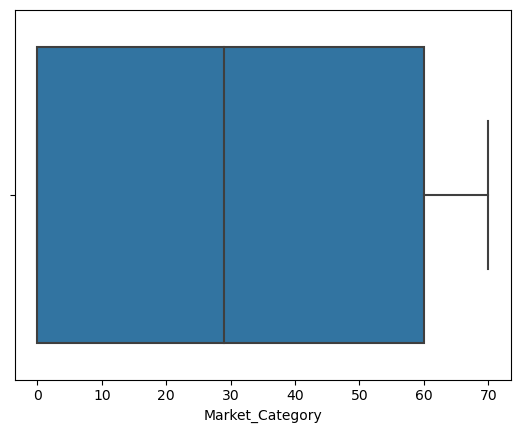

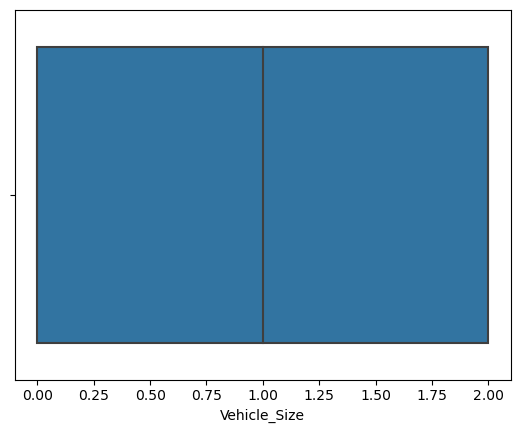

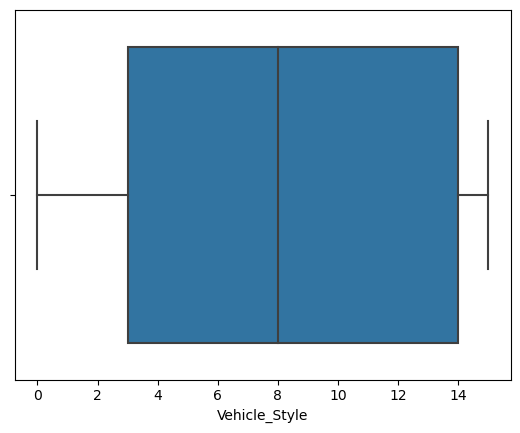

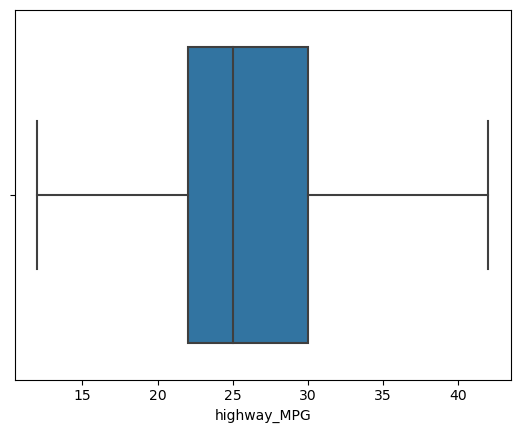

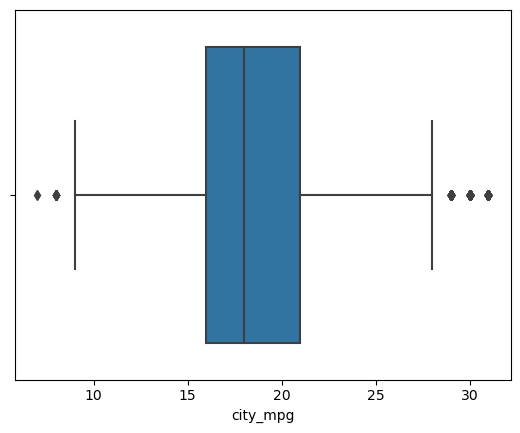

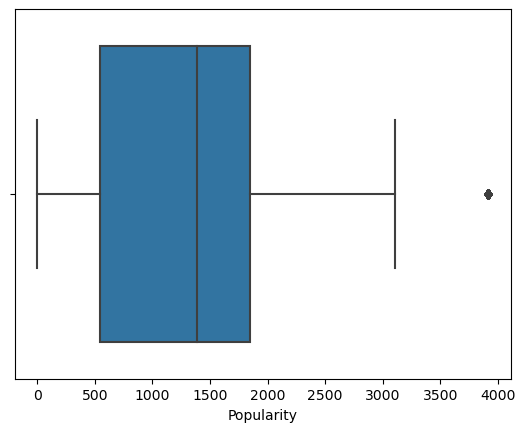

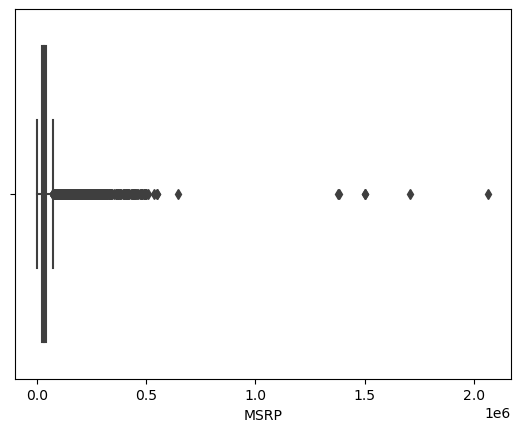

In [78]:
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [81]:
# splitting the dependent and independent variables

x = df[['Popularity','Year','Engine_HP','Engine_Cylinders','highway_MPG']].values
y = df['MSRP'].values

print(x.shape)
print(y.shape)

(11199, 5)
(11199,)


In [82]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [83]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8959, 5)
(8959, 1)
(2240, 5)
(2240, 1)


In [84]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.13551566172852236
Testing Accuracy : 0.13872287779122394


In [86]:
#SVM
from sklearn.svm import SVR
svr_model=SVR(kernel = 'rbf')
svr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",svr_model.score(x_train,y_train))
print("Testing Accuracy :",svr_model.score(x_test,y_test))

Training Accuracy : 0.36779375217561605
Testing Accuracy : 0.36191521582939545


In [88]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))

Training Accuracy : 0.9224548659005747
Testing Accuracy : 0.7953114604657091


In [ ]:
Conclusion

Random Forest gives highest accuracy hence it is the best algorithm to predict Car Prices